In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
# pip install hyperopt
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import copy
sns.set(style = "darkgrid", 
        color_codes = True,
        font_scale = 1.5)
# pip install scikit-optimize
from skopt import BayesSearchCV

In [2]:
df = pd.read_csv('whether_car.csv')
df = df.rename(columns = {'acc_x': 'acceleration_x', 'acc_y': 'acceleration_y', 'acc_z': 'acceleration_z', 'target': 'is_car'})

In [3]:
df

,acceleration_x,acceleration_y,acceleration_z,is_car
0,-0.113725,0.083797,9.654618,0
1,-0.098162,0.087388,9.630676,0
2,-0.099359,0.094571,9.645041,0
3,-0.099359,0.089783,9.649830,0
4,-0.118513,0.087388,9.634268,0
...,...,...,...,...
119995,-0.624887,7.577648,6.683414,1
119996,-0.508768,7.480683,6.556521,1
119997,-0.409408,7.443573,6.370971,1
119998,-0.373495,7.406463,6.108806,1


In [4]:
car = df[df['is_car'] == 1]
ped = df[df['is_car'] == 0]

In [5]:
car.describe()

,acceleration_x,acceleration_y,acceleration_z,is_car
count,60000.000000,60000.000000,60000.000000,60000.0
mean,-0.873403,8.068328,5.046530,1.0
std,0.739086,0.878719,1.305519,0.0
min,-5.628768,1.561020,-2.694674,1.0
25%,-1.329979,7.599196,4.206613,1.0
50%,-0.834379,8.170214,4.972757,1.0
75%,-0.392649,8.647857,5.839458,1.0
max,2.498349,12.011710,15.529989,1.0


In [6]:
# car.boxplot(column=['acc_x','acc_y','acc_z'])
# ped.boxplot(column=['acc_x','acc_y','acc_z'])

In [7]:
# test = df.sample(n=100000, random_state=20)
# test

(-10.0, 20.0)

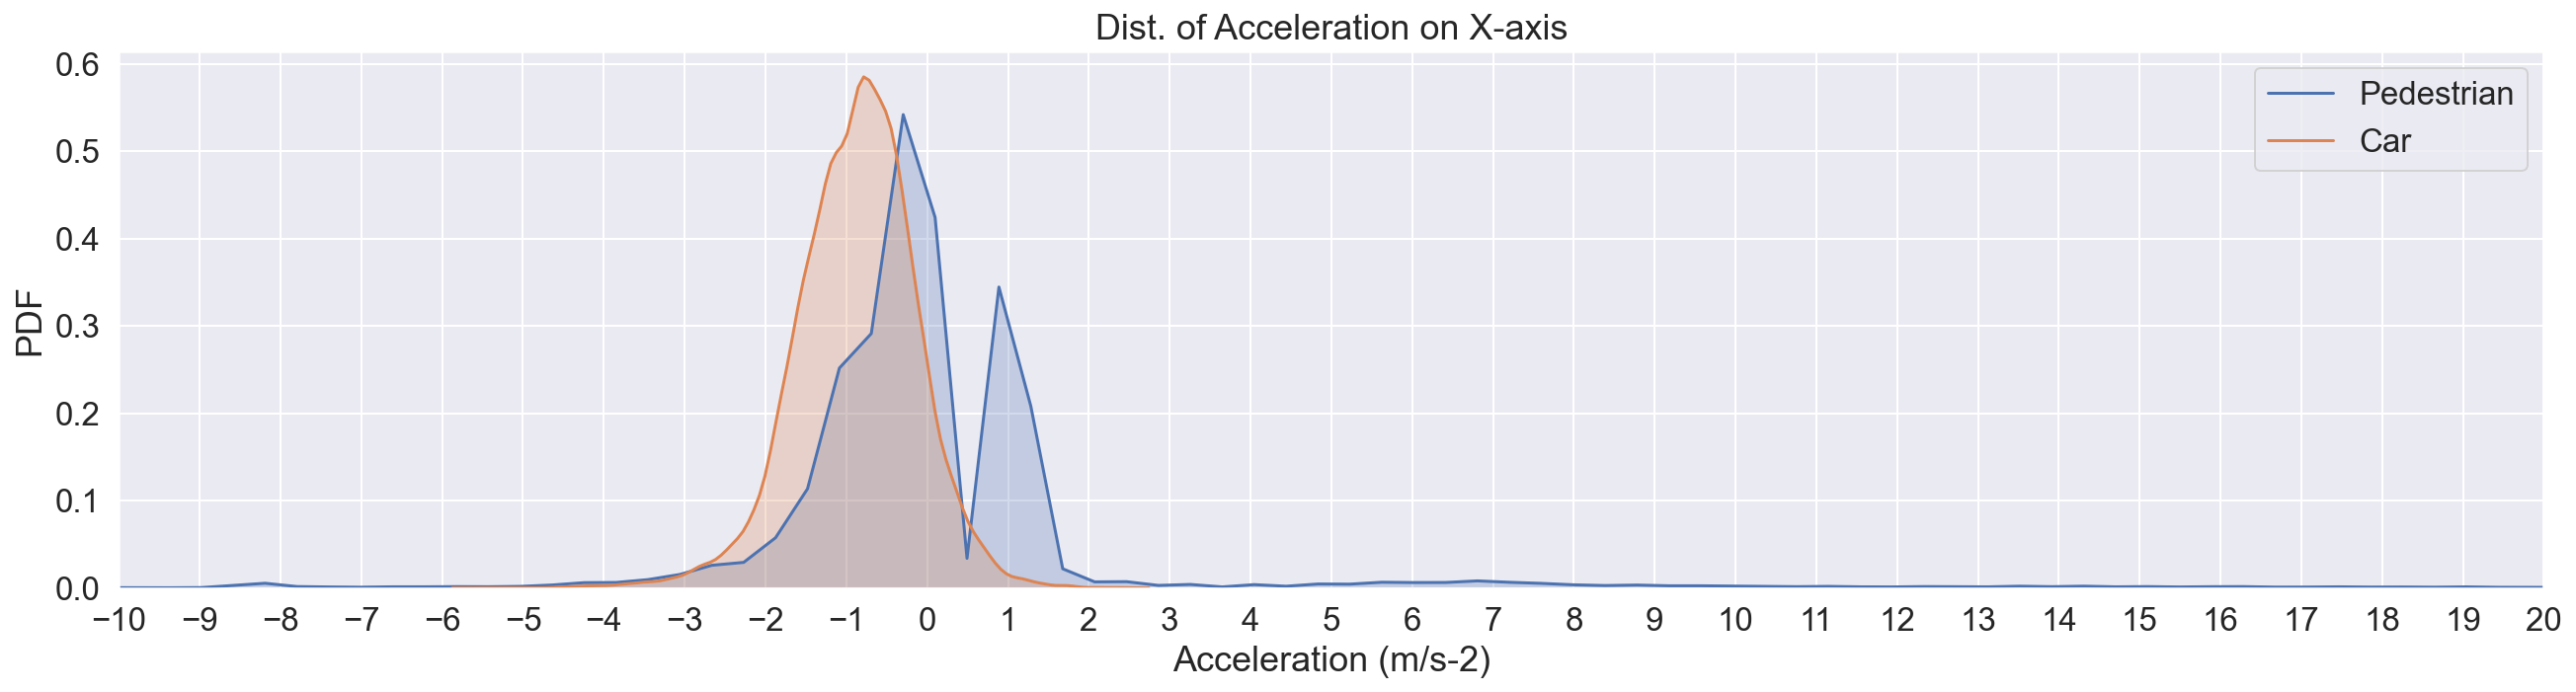

In [85]:
fig, ax = plt.subplots(figsize=(22, 5))
sns.kdeplot(ped['acceleration_x'], shade = True, ax = ax)
sns.kdeplot(car['acceleration_x'], shade = True, ax = ax)
plt.legend(("Pedestrian", "Car"), loc = "upper right")
plt.title('Dist. of Acceleration on X-axis')
plt.xlabel('Acceleration (m/s-2)')
plt.ylabel('PDF')
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlim(-10.0,20.0)

(-10.0, 20.0)

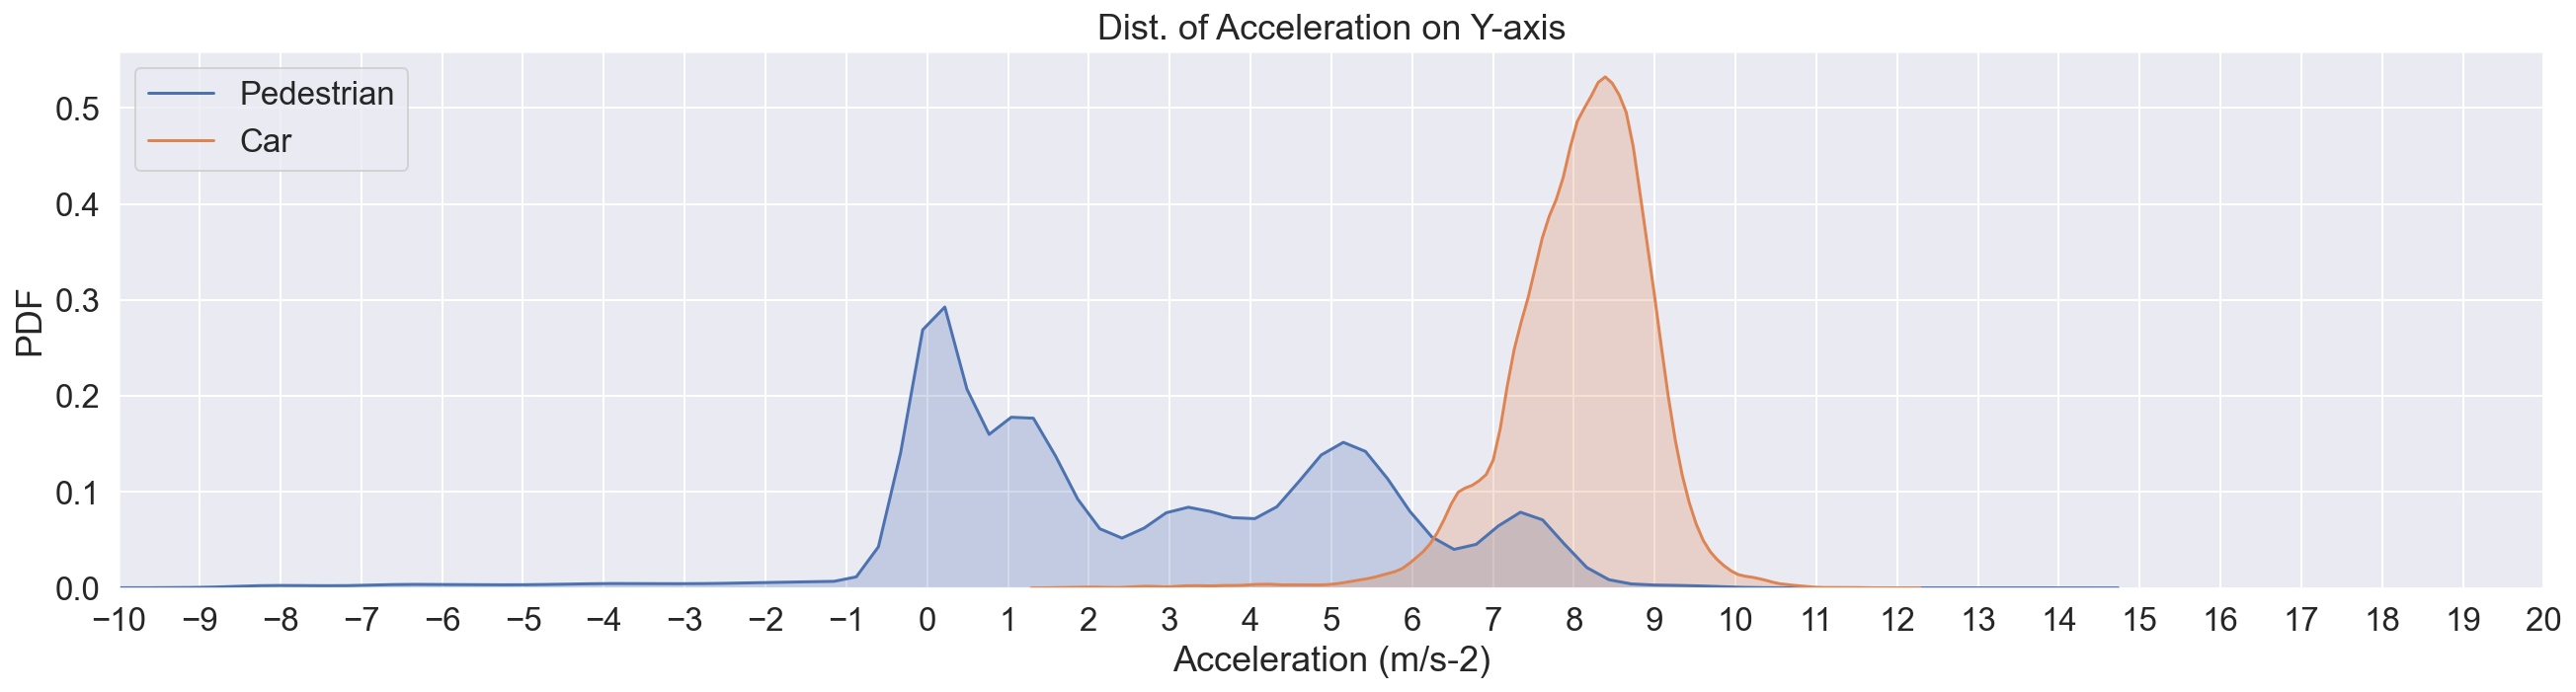

In [73]:
fig, ax = plt.subplots(figsize=(22, 5))
sns.kdeplot(ped['acceleration_y'], shade = True, ax = ax)
sns.kdeplot(car['acceleration_y'], shade = True, ax = ax)
plt.legend(("Pedestrian", "Car"), loc = "upper left")
plt.title('Dist. of Acceleration on Y-axis')
plt.xlabel('Acceleration (m/s-2)')
plt.ylabel('PDF')
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlim(-10.0,20.0)

(-10.0, 20.0)

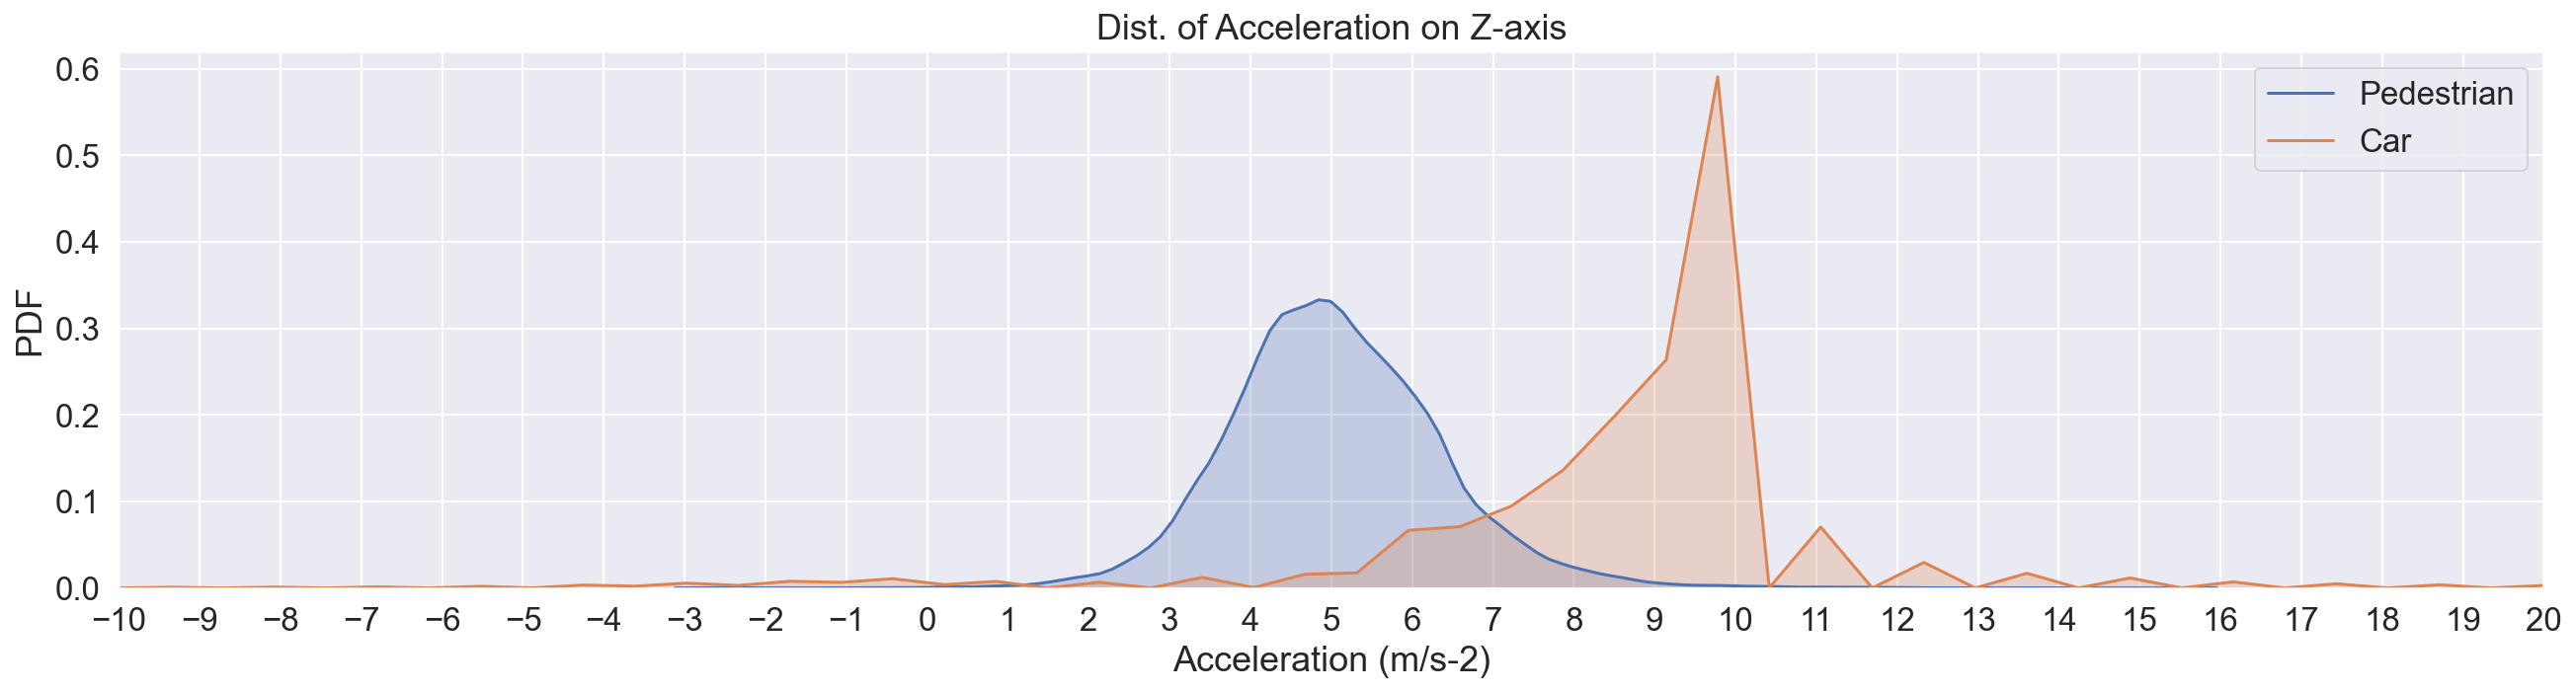

In [75]:
fig, ax = plt.subplots(figsize=(22, 5))
sns.kdeplot(car['acceleration_z'], shade = True, ax = ax)
sns.kdeplot(ped['acceleration_z'], shade = True, ax = ax)
plt.legend(("Pedestrian", "Car"), loc = "upper right")
plt.title('Dist. of Acceleration on Z-axis')
plt.xlabel('Acceleration (m/s-2)')
plt.ylabel('PDF')
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlim(-10.0,20.0)

In [86]:
data = df.drop(columns = ['is_car']).values
# data = preprocessing.StandardScaler().fit_transform(data)
label = df['is_car'].values
# label = preprocessing.LabelEncoder().fit_transform(label)
data

array([[-0.11372458,  0.08379706,  9.654618  ],
       [-0.09816227,  0.08738836,  9.630676  ],
       [-0.09935937,  0.09457097,  9.645041  ],
       ...,
       [-0.40940848,  7.443573  ,  6.3709707 ],
       [-0.37349546,  7.406463  ,  6.1088057 ],
       [-0.41060558,  7.3873096 ,  5.8262897 ]])

In [87]:
label

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   label,
                                                   test_size = 0.25,
                                                   random_state = 42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test,
                                                   y_test,
                                                   test_size = 0.3,
                                                   random_state = 43)

In [89]:
logreg = LogisticRegression(max_iter=1000)                                
logreg.fit(X_train, y_train)                                 
y_prediction = logreg.predict(X_validation)                               
acc_logreg = sum(y_prediction == y_validation)/len(y_validation)      
print('Logistic Regression: ', str(round(acc_logreg,6)))

Logistic Regression:  0.92519


In [90]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
kNN = knn_classifier.score(X_validation, y_validation)
print('KNN: ', str(round(kNN,6)))

KNN:  0.942429


In [91]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 20)
dt_classifier.fit(X_train, y_train)
dT = dt_classifier.score(X_validation, y_validation)
print('Decision Tree: ',  str(round(dT,6)))

Decision Tree:  0.936571


In [92]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
acc_perceptron = perceptron.score(X_validation, y_validation)
print('Perceptron: ', str(round(acc_perceptron,6)))

Perceptron:  0.856857


In [93]:
gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(X_train, y_train)
acc_xgboost = gradboost.score(X_validation, y_validation)
print('XGBoost: ', str(round(acc_xgboost,6)))

XGBoost:  0.964143


In [94]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
acc_rfc = rfc.score(X_validation, y_validation)
print('Random Forest: ', str(round(acc_rfc,6)))

Random Forest:  0.931429


In [106]:
print('Validation accuracy: \n')
# print('XGBoost: ', str(round(acc_xgboost,4)))
print('- KNN: ', str(round(kNN,4)))
print('- Decision Tree: ', str(round(dT,4)))
print('Random Forest: ', str(round(acc_rfc,4)))
print('Logistic Regression: ', str(round(acc_logreg,4)))
print('Perceptron: ', str(round(acc_perceptron,4)))
print('XGBoost: kernal timeout')
print('SVM: kernal timeout')

Validation accuracy: 

- KNN:  0.9424
- Decision Tree:  0.9366
Random Forest:  0.9314
Logistic Regression:  0.9252
Perceptron:  0.8569
XGBoost: kernal timeout
SVM: kernal timeout


In [126]:
pred = knn_classifier.predict(X_validation)
print("Accuracy:", metrics.accuracy_score(pred, y_validation))
print("Confusion Matrix:\n", metrics.confusion_matrix(pred, y_validation))


Accuracy: 0.9424285714285714
Confusion Matrix:
 [[9857  483]
 [ 726 9934]]


In [99]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state= 6758)

import numpy as np
params_KNN = {'n_neighbors': [1, 3, 5, 7, 9], 
              'p': [1, 2, 5]}

from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=2,  # verbose: the higher, the more messages
                      scoring='accuracy',
                      n_jobs= -2,
                      return_train_score=True)

In [100]:
gs_KNN.fit(X_train, y_train)

Fitting 15 folds for each of 15 candidates, totalling 225 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done 225 out of 225 | elapsed:  3.2min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=6758),
             estimator=KNeighborsClassifier(), n_jobs=-2,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2, 5]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [108]:
# space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
#         'gamma': hp.uniform ('gamma', 1,9),
#         'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
#         'reg_lambda' : hp.uniform('reg_lambda', 0,1),
#         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
#         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
#         'n_estimators': 180,
#         'seed': 0}

In [109]:
# from sklearn.metrics import accuracy_score
# def objective(space):
#     clf=xgb.XGBClassifier(
#                     n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
#                     reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
#                     colsample_bytree=int(space['colsample_bytree']))
    
#     evaluation = [(X_train, y_train), (X_test, y_test)]
    
#     clf.fit(X_train, y_train,
#             eval_set=evaluation, eval_metric="auc",
#             early_stopping_rounds=10,verbose=False)
    

#     pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, pred>0.5)
#     # print ("SCORE:", accuracy)
#     return {'loss': -accuracy, 'status': STATUS_OK }

In [103]:
# trials = Trials()

# best_hyperparams = fmin(fn = objective,
#                         space = space,
#                         algo = tpe.suggest,
#                         max_evals = 100,
#                         trials = trials)

#  print(best_hyperparams)

In [114]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['Mean_CV_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1, 2, 5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN = results_KNN.sort_values(by = 'Mean_CV_score', ascending = False)
results_KNN

,n_neighbors,p,Mean_CV_score,metric
13,9,2,0.945793,Euclidean
12,9,1,0.945741,Manhattan
14,9,5,0.945541,Minkowski
9,7,1,0.945363,Manhattan
10,7,2,0.945074,Euclidean
11,7,5,0.945007,Minkowski
6,5,1,0.944263,Manhattan
7,5,2,0.943785,Euclidean
8,5,5,0.943611,Minkowski
3,3,1,0.940785,Manhattan


In [105]:
import altair as alt
alt.renderers.enable('html')

alt.Chart(results_KNN, 
          title='KNN Metric Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('n_neighbors', title='Number of Neighbors'),
    alt.Y('Validation_acc', title='Mean CV Score', scale=alt.Scale(zero=False)),
    color='metric'
).interactive()

alt.Chart(...)

In [119]:
knn = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = "euclidean")
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
print('KNN: ', str(round(acc, 6)))

KNN:  0.946111


In [115]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=375)

# 'max_features': ['auto', 'sqrt', 'log2'],
params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [5, 6, 7, 8, 10, 12, 15, 17],
             'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1,
                     n_jobs=-1,
                     scoring='accuracy')

In [116]:
gs_DT.fit(X_train, y_train)

Fitting 15 folds for each of 352 candidates, totalling 5280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5280 out of 5280 | elapsed:  2.9min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=6758),
             estimator=DecisionTreeClassifier(random_state=375), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 10, 12, 15, 17],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11],
                         'min_samples_split': [2, 3]},
             scoring='accuracy', verbose=1)

In [117]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['Validation_acc'] = gs_DT.cv_results_['mean_test_score']

alt.Chart(results_DT, 
          title='DT Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('Validation_acc', title='Mean CV Score', aggregate='average', scale=alt.Scale(zero=False)),
    color='criterion'
).interactive()

alt.Chart(...)